# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
df = pd.read_csv("Ads_CTR_Optimisation.csv")
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


## Implementing Thompson Sampling

In [3]:
import random

N, d = 500, 10
ads_selected = []
numbers_of_rewards_0 = np.zeros((d,), int)
numbers_of_rewards_1 = np.zeros((d,), int)

for n in range(N):
    ad = 0
    max_random = 0

    for i in range(d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1,numbers_of_rewards_0[i] + 1)

        if random_beta > max_random:
            max_random = random_beta
            ad = i

    ads_selected.append(ad)

    if df.iloc[n, ad] == 0:
        numbers_of_rewards_0[ad] += 1
    else:
        numbers_of_rewards_1[ad] += 1

total_reward = numbers_of_rewards_1.sum()

## Visualising the results - Histogram

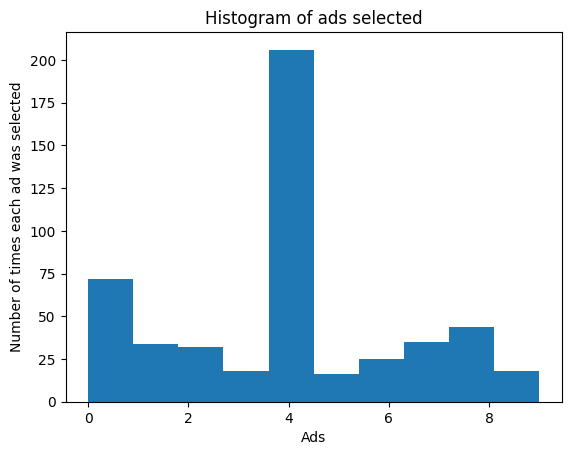

In [4]:
plt.hist(ads_selected)
plt.title("Histogram of ads selected")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()